<a href="https://colab.research.google.com/github/ChrisLezama/Telecom_1_Challenge_2_Alura_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

## Extrayendo datos del archivo JSON

In [ ]:
#Convirtiendo Data Frame de pandas
import pandas as pd

data=pd.read_json("TelecomX_Data.json")
data.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


De estos datos es posible apreciar que algunos tienen mas datos dentro por lo que se debe de normalizar el archivo JSON

#🔧 Transformación

##Normalizacion del archivo JSON

In [ ]:
columns_to_normalize = ['customer','phone', 'internet', 'account']

for col in columns_to_normalize:
    normalized_data = pd.json_normalize(data[col])

    # Cconcatenando las columnas para reemplazar en la tabal original
    data = pd.concat([data.drop(col, axis=1), normalized_data], axis=1)

columnas= list(data.columns)
print(columnas)

data.head()


## Seleccion de columnas con las que trabajar

In [42]:

columnas= ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'Charges.Monthly', 'Charges.Total']
data_analyze=data[columnas]
data_analyze.head(10)






,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,90.45,5957.9


## Revision de incoherencias

In [50]:
import numpy as np
#Revision de duplicados en ID
data_analyze["customerID"].duplicated().sum()

#Conversion de Datos
data_analyze['Charges.Total'] = data_analyze['Charges.Total'].replace(' ', np.nan)
data_analyze = data_analyze.astype({"Charges.Monthly": "float64", "Charges.Total": "float64"})

data_analyze.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7267 non-null   object 
 2   gender           7267 non-null   object 
 3   SeniorCitizen    7267 non-null   int64  
 4   Partner          7267 non-null   object 
 5   Dependents       7267 non-null   object 
 6   tenure           7267 non-null   int64  
 7   Charges.Monthly  7267 non-null   float64
 8   Charges.Total    7256 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 511.1+ KB


## Manejo de Inconsistencias

In [56]:
col_replace=['ID', 'Dejo', 'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Meses', 'Cargos_Mensuales', 'Cargos_Totales']

data_analyze.rename(columns=dict(zip(data_analyze.columns, col_replace)), inplace=True)
data_analyze.head()



,ID,Dejo,Genero,Adulto_Mayor,Pareja,Dependientes,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
0,0002-ORFBO,No,Female,0,Yes,Yes,9,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,83.9,267.40,2.796667


## Columna de Costo Diario

In [ ]:
data_analyze['Costo_Diario'] = data_analyze['Cargos_Mensuales'] / 30
data_analyze.head()

# Estandarizacion de la columna Dejo


In [66]:
import numpy as np
data_analyze['Dejo'] = data_analyze['Dejo'].replace({'No': 0, 'Yes': 1})
data_analyze.head()

data_analyze.info()
data_analyze["Dejo"]=data_analyze["Dejo"].astype(np.int64)
data_analyze.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Dejo              7267 non-null   bool   
 2   Genero            7267 non-null   object 
 3   Adulto_Mayor      7267 non-null   int64  
 4   Pareja            7267 non-null   object 
 5   Dependientes      7267 non-null   object 
 6   Meses             7267 non-null   int64  
 7   Cargos_Mensuales  7267 non-null   float64
 8   Cargos_Totales    7256 non-null   float64
 9   Costo_Diario      7267 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 518.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                7267 non-null   object 
 1   Dej

#📊 Carga y análisis

## Analisis Descriptivo

In [67]:
data_analyze.describe()

,Dejo,Adulto_Mayor,Meses,Cargos_Mensuales,Cargos_Totales,Costo_Diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.257190,0.162653,32.346498,64.720098,2280.634213,2.157337
std,0.437115,0.369074,24.571773,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,9.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,29.000000,70.300000,1391.000000,2.343333
75%,1.000000,0.000000,55.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,72.000000,118.750000,8684.800000,3.958333


## Analisis Grafico Relacional de gente que Dejo la Empresa

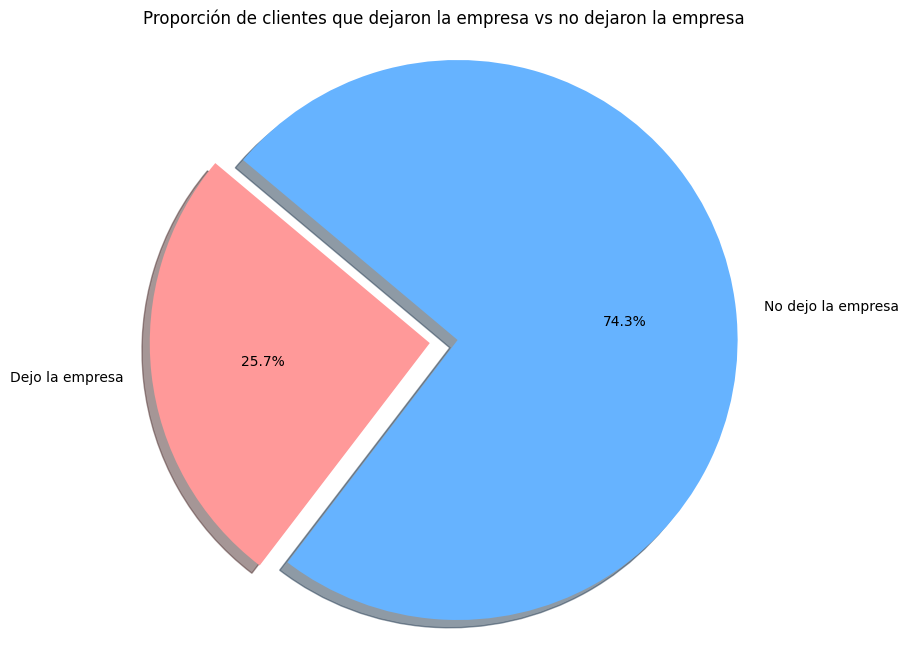

In [71]:
data_analyze.head()
import matplotlib.pyplot as plt


count1=data_analyze[data_analyze["Dejo"]==1].count()
count2=data_analyze[data_analyze["Dejo"]==0].count()

labels = ['Dejo la empresa', 'No dejo la empresa']
sizes = [count1['Dejo'], count2['Dejo']] # Using 'Dejo' as the column name for counts
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proporción de clientes que dejaron la empresa vs no dejaron la empresa')
plt.show()

## Variables Categoricas

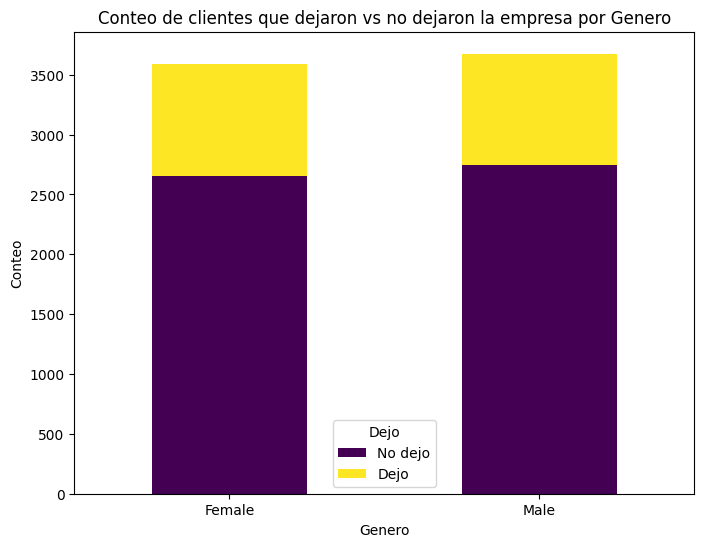

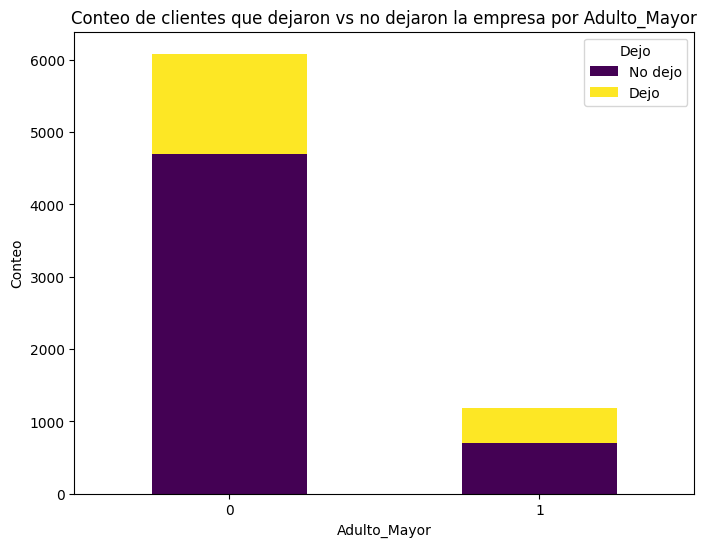

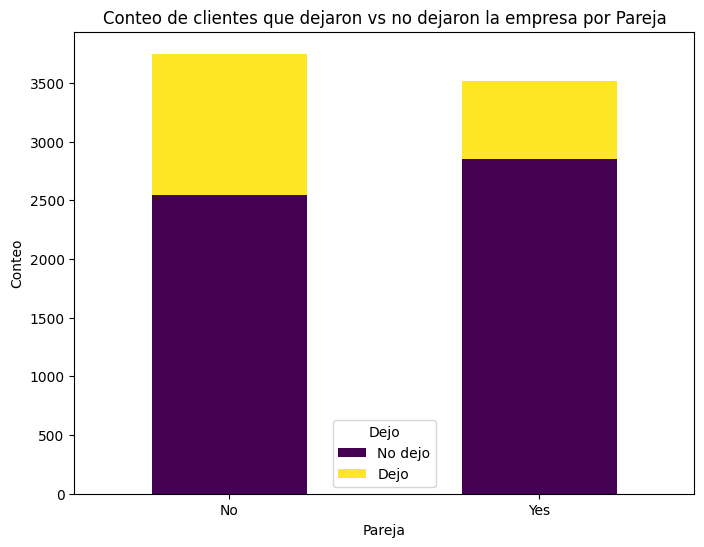

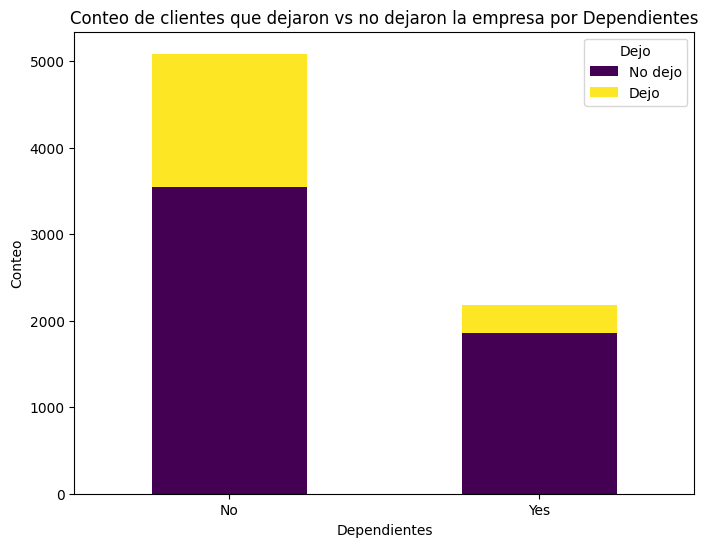

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_columns = ['Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes']

for col in categorical_columns:
    plt.figure(figsize=(8, 6))

    grouped_data = data_analyze.groupby([col, 'Dejo']).size().unstack(fill_value=0)

    grouped_data.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
    plt.title(f'Conteo de clientes que dejaron vs no dejaron la empresa por {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=0)
    plt.legend(title='Dejo', labels=['No dejo', 'Dejo'])
    plt.show()

## Variables Numericas

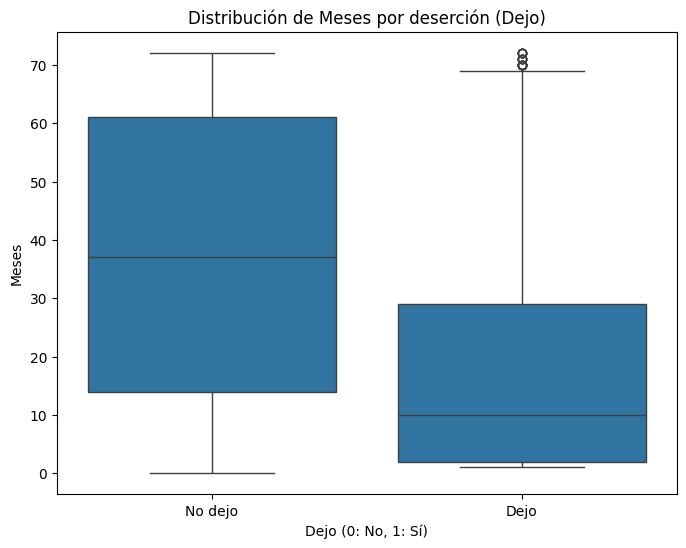

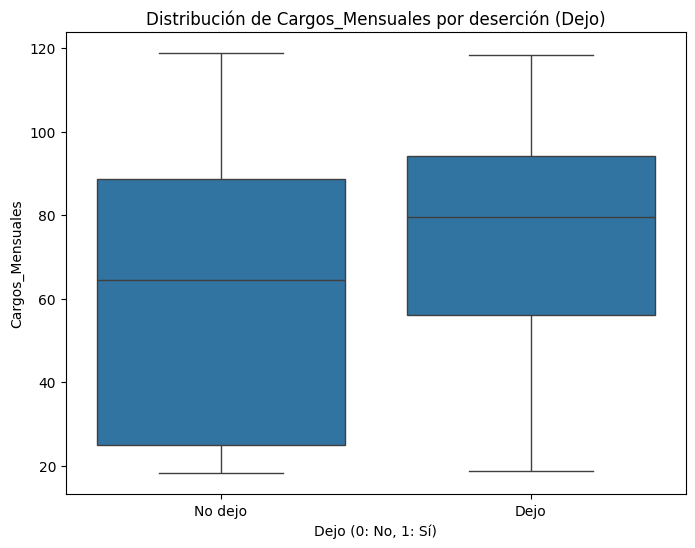

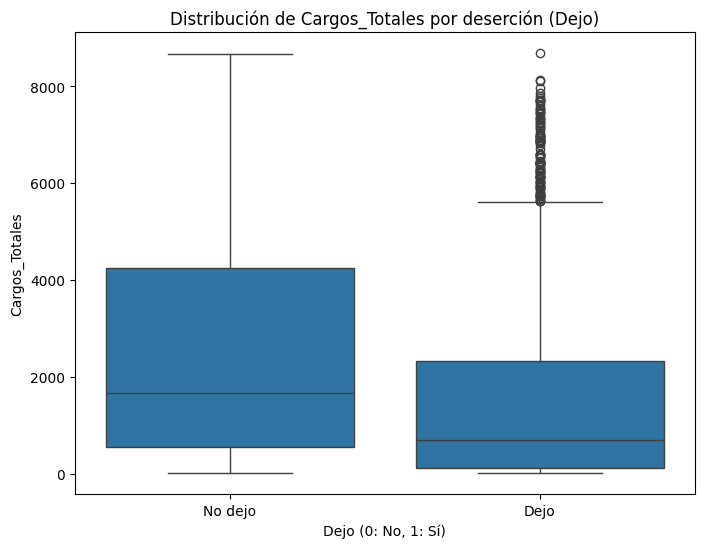

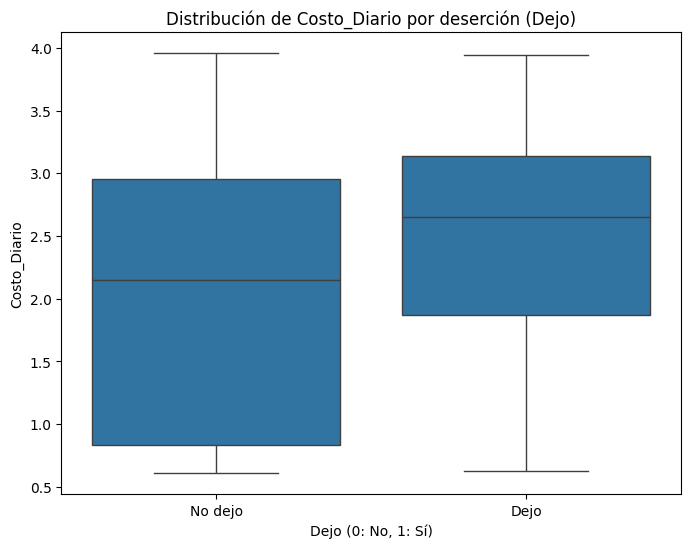

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Costo_Diario']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Dejo', y=col, data=data_analyze)
    plt.title(f'Distribución de {col} por deserción (Dejo)')
    plt.xlabel('Dejo (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks([0, 1], ['No dejo', 'Dejo'])
    plt.show()

#📄Informe final

# 1. Introduccion

En el presente analisis se realizo un estudio sobre informacion proporcionada por la empresa Telecom X, en la cual se empezo a presentar el problema de un aumento en la deserción por parte de los usuarios, por lo que se nos pidio analizar los datos y proponer estrategias de retención para los usuarios que se empiecen a unir.

#2. Metodologia

Para poder realizar el analisis se siguieron los siguientes pasos:


*   Importacion de los Datos
*   Limpieza, normalizacion y eleccion de las variables a analizar
*   Analisis exploratorio de los datos
*   Visualizacion de patrones y tendencias
*   Generacion de conclusiones y planteamiento de recomendaciones



#3. Resultados Obtenidos

Tras el analisis hecho fue posible apreciar que de la informacion proporcionada, solo el 25.7% del total dejo la empresa, de ese valor las variables personales nos indican que la gente que deja a la empresa no es generalmente por tener dependientes de ellos, la mayoria son hombres y no suelen tener pareja.

Hablando ahora de las variables numericas, las personas que cancelan lo hacen principalmente en los primeros meses, y suelen presentar un valor promedio mas alto que los usuarios de mayor tiempo o que siguen dentro de la empresa. En ese sentido fue posible apreciar que 1 de cada 4 personas abandonan la empresa.

# 4. Recomendaciones

Con base a lo observado y que las personas que abandondan son personas que contratan el servicio por pocos periodos de tiempo, se sugiere revisar la posibilidad de implementar planes a largo plazo de contratacion de servicio que muestren una relativa diferencia en comparacion con una contratacion mensual habitual.